# Statistik om Iris blommor

Import av bibliotek

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\JuliaSjöholm-AI23GBG\AppData\Local\Temp\ipykernel_3608\2565421471.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Läsa in datasetet

In [3]:
iris_data = pd.read_csv('../Data/iris.csv')

# Using rename() to remove blank spaces
iris_data.rename(columns={" sepal_width": "sepal_width", " petal_length": "petal_length", " petal_width": "petal_width", " class": "class"}, inplace=True)
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Lägesmått eller mått på centraltendens

Av nedan deskriptiva mått kan vi se att vi har 150 datapunkter, medelvärde på irisblommors bägarblads längd på 5,8 cm och bredd på 3,05 cm. Kronbladen däremot har en medellängd på 3,76 cm och bredd på 1.20 cm. Funktionen ger även information om min och max, kvartilerna (25%, 50%, och 75 %) och standardavvikelen (std).

In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Typvärde

Genom att använda oss av nedan funktion 'mode()' får vi informationen om typvärdet som består av tre sortes Irisblommor, genom att sedan räkna antal värden får vi informationen om att samtliga ingående sorter i datasetet av isisblomman är typvärden. Det visas även tydligt i histogrammet nedan.

In [5]:
iris_data['class'].mode()

0        Iris-setosa
1    Iris-versicolor
2     Iris-virginica
Name: class, dtype: object

In [6]:
iris_data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

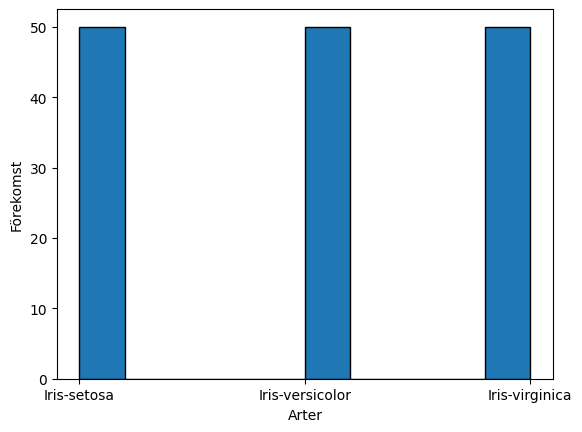

In [7]:
plt.hist(iris_data['class'],edgecolor = 'black')
plt.xlabel('Arter',fontsize =10)
plt.ylabel('Förekomst',fontsize=10)
plt.show()

1. Artjämförelse:

Forskningsfråga: Skiljer sig olika arter av irisblommor (Setosa, Versicolor, Virginica) signifikant åt när det gäller deras bägarblads- och kronbladsegenskaper?

Hypotes: Det finns signifikanta skillnader i bägarblads- och kronbladsegenskaper (t.ex. längd och bredd) bland de tre irisarterna.

In [8]:
setosa = iris_data[iris_data['class']=="Iris-setosa"]
versicolor = iris_data[iris_data['class']=="Iris-versicolor"]
virginica = iris_data[iris_data['class']=="Iris-virginica"]

print(f"\nSetosa:\n {setosa.describe()}")
print(f"\nVersicolor:\n {versicolor.describe()}")
print(f"\nVirginica:\n {virginica.describe()}")


Setosa:
        sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Versicolor:
        sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300

Från ovan kod kan vi utläsa att bägarbladens längd och bredd skiljer sig väsentligt om man kollar på dess medelvärden. Setosas blad har i genomsnitt en kortare längd men bredare blad, Virinica har däremot i genomsnitt en längre blad men är då lite smalare. Versicolor beginner sig mellan de båda gällande både längd och bredd. Det mönstret syns även i nedan diagram där samtliga datapunkter representeras.

Vad gäller kronbladen ser vi däremot att setosa är allra minst i genomsnitt av de tre, Versicolor är generellt sätt större och bredare och Virinica har både längst och bredast medelvärde av de tre sorterna. Nedan diagram visar samtliga datapunkter.

<Figure size 1000x600 with 0 Axes>

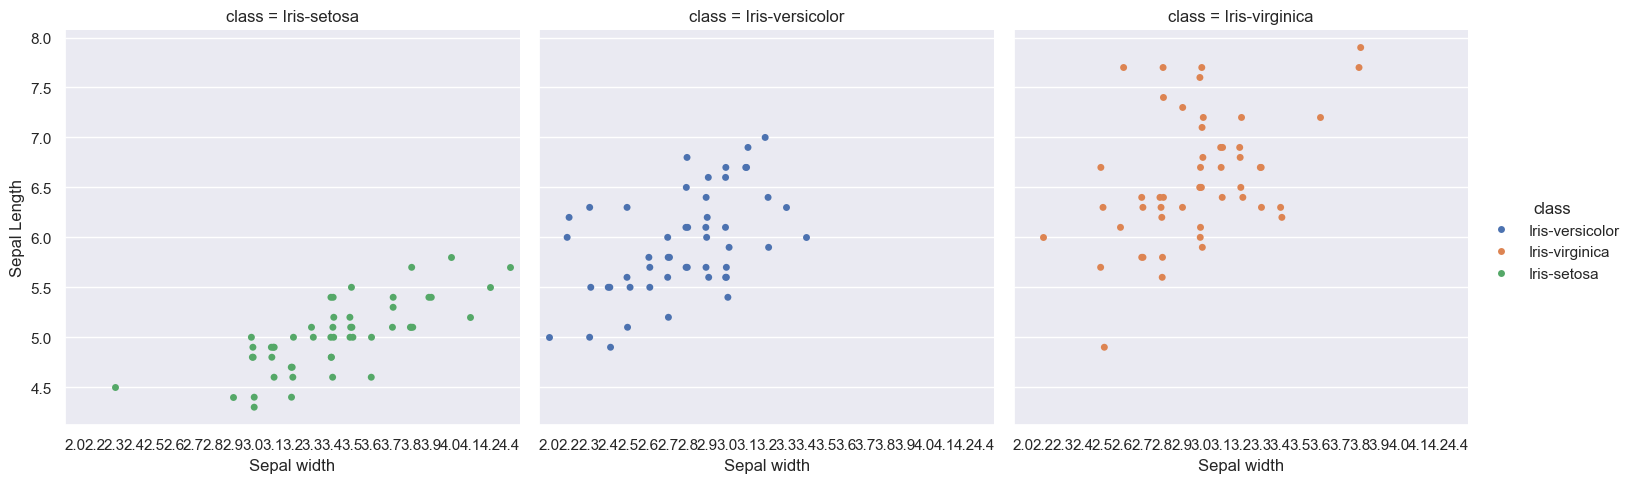

In [9]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.catplot(iris_data, 
              x='sepal_width', 
              y='sepal_length',
              hue='class',
              col='class',
              ).set_xlabels('Sepal width').set_ylabels('Sepal Length')


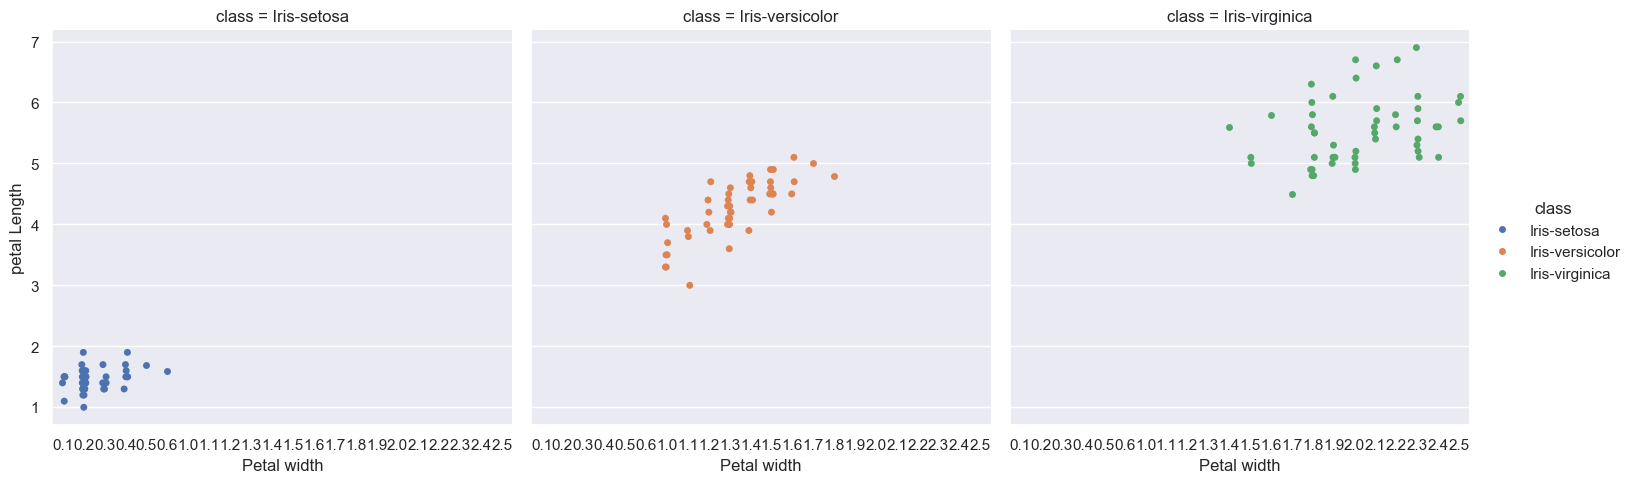

In [10]:
sns.catplot(iris_data, 
              x='petal_width', 
              y='petal_length',
              hue='class',
              col='class',
              ).set_xlabels('Petal width'). set_ylabels('petal Length')

In [11]:
setosa_petal_length_std = setosa['petal_length'].std()
setosa_petal_width_std = setosa['petal_width'].std()
versicolor_petal_length_std = versicolor['petal_length'].std()
versicolor_petal_width_std = versicolor['petal_width'].std()
virginica_petal_length_std = virginica['petal_length'].std()
virginica_petal_width_std = virginica['petal_width'].std()
setosa_sepal_length_std = setosa['sepal_length'].std()
setosa_sepal_width_std = setosa['sepal_width'].std()
versicolor_sepal_length_std = versicolor['sepal_length'].std()
versicolor_sepal_width_std = versicolor['sepal_width'].std()
virginica_sepal_length_std = virginica['sepal_length'].std()
virginica_sepal_width_std = virginica['sepal_width'].std()

print(f"Setosas bägarblads längds standardavvikelse är {setosa_sepal_length_std:.2f} och bredd är {setosa_sepal_width_std:.2f}.")
print(f"Setosas kronblads längds standardavvikelse är {setosa_petal_length_std:.2f} och bredd är {setosa_petal_width_std:.2f}.")
print()
print(f"Versicolor bägarblads längds standardavvikelse är {versicolor_sepal_length_std:.2f} och bredd är {versicolor_sepal_width_std:.2f}.")
print(f"Versicolor kronblads längds standardavvikelse är {versicolor_petal_length_std:.2f} och bredd är {versicolor_petal_width_std:.2f}.")
print()
print(f"Virginica bägarblads längds standardavvikelse är {virginica_sepal_length_std:.2f} och bredd är {versicolor_sepal_width_std:.2f}.")
print(f"Virginica kronblads längds standardavvikelse är {virginica_petal_length_std:.2f} och bredd är {versicolor_petal_width_std:.2f}.")


Setosas bägarblads längds standardavvikelse är 0.35 och bredd är 0.38.
Setosas kronblads längds standardavvikelse är 0.17 och bredd är 0.11.

Versicolor bägarblads längds standardavvikelse är 0.52 och bredd är 0.31.
Versicolor kronblads längds standardavvikelse är 0.47 och bredd är 0.20.

Virginica bägarblads längds standardavvikelse är 0.64 och bredd är 0.31.
Virginica kronblads längds standardavvikelse är 0.55 och bredd är 0.20.


### Konfidensintervall
Konfidensintervall för att se hur troligt det är att populationsparameterarna gällande bägarblad (Sepal) faller inom det för de olika arterna vad gäller längd.

Hypotes: 
Eftersom det är störst standardavvikelse på Virginicas bägarblads längd får vi anta att konfidensintervallet blir högre.

In [21]:
# Beräkna medelvärdet för stickproven gällande längden 
n=50 # Detta såg vi tidigare att de av alla tre arter fanns 50 datapunkter, sätter det därför som en fast variabel
alpha = 0.05 # Signifikansnivå

sem_setosa = scs.sem(setosa['sepal_length']) # Beräkna standard error med sem()
sem_versicolor = scs.sem(versicolor['sepal_length']) # Beräkna standard error med sem()
sem_virginica = scs.sem(virginica['sepal_length']) # Beräkna standard error med sem()

setosa_mean = np.mean(setosa['sepal_length'])
versicolor_mean = np.mean(versicolor['sepal_length'])
virginica_mean = np.mean(virginica['sepal_length'])

# Beräkna konfidensintervall (lower and upper) för bägarblad (e.g., sepal length) and species
lower_setosa, upper_setosa = scs.t.interval(confidence=1-alpha, df=n-1, loc=setosa_mean, scale=sem_setosa)
lower_versicolor, upper_versicolor = scs.t.interval(confidence=1-alpha, df=n-1, loc=versicolor_mean, scale=sem_versicolor)
lower_virginica, upper_virginica = scs.t.interval(confidence=1-alpha, df=n-1, loc=virginica_mean, scale=sem_virginica)

# The confidence_interval variable now contains the lower and upper bounds of the confidence interval.
print(f'Konfidensintervall för {alpha=} för medellängd på Iris Setosa bägarblad: {round(lower_setosa,1)}-{round(upper_setosa,1)} cm' ) 
print(f'Konfidensintervall för {alpha=} för medellängd på Iris Vesicolors bägarblad: {round(lower_versicolor,1)}-{round(upper_versicolor,1)} cm') 
print(f'Konfidensintervall för {alpha=} för medellängd på Iris Virginica bägarblad: {round(lower_virginica,1)}-{round(upper_virginica,1)} cm') 

Konfidensintervall för alpha=0.05 för medellängd på Iris Setosa bägarblad: 4.9-5.1 cm
Konfidensintervall för alpha=0.05 för medellängd på Iris Vesicolors bägarblad: 5.8-6.1 cm
Konfidensintervall för alpha=0.05 för medellängd på Iris Virginica bägarblad: 6.4-6.8 cm


Av ovan kan vi se att störst konfindensintervall påträffas mycket riktigt på stickprovet innehållande Virginicas  bägarblad, +- 0,2. 

### Hypotestest

Alternativ hypotesen (H1): Bägar- och kronblad har signifikanta skillnader på längd och bredd egenskaper.

Noll hypotes (H0): Det är ingen signifikant skillnad på egenskaperna (längd och bredd) på bägar- och kronblad på irisblommor.

In [22]:
# Calculate the differences between sepal and petal lengths
sepal_length_diff = iris_data['sepal_length'] - iris_data['petal_length']
sepal_width_diff = iris_data['sepal_width'] - iris_data['petal_width']

# Perform paired t-tests for sepal and petal lengths and widths
t_stat_length, p_value_length = scs.ttest_rel(iris_data['sepal_length'], iris_data['petal_length'])
t_stat_width, p_value_width = scs.ttest_rel(iris_data['sepal_width'], iris_data['petal_width'])

# Set the significance level
alpha = 0.05

# Check the results for sepal vs. petal length
if p_value_length < alpha:
    print("Reject the null hypothesis for length: There is a significant difference between sepal and petal lengths.")
else:
    print("Fail to reject the null hypothesis for length: There is no significant difference between sepal and petal lengths.")

# Check the results for sepal vs. petal width
if p_value_width < alpha:
    print("Reject the null hypothesis for width: There is a significant difference between sepal and petal widths.")
else:
    print("Fail to reject the null hypothesis for width: There is no significant difference between sepal and petal widths.")



Reject the null hypothesis for length: There is a significant difference between sepal and petal lengths.
Reject the null hypothesis for width: There is a significant difference between sepal and petal widths.


### Korrelations och regressionsanalys

Vi såg tidigare att det var en signifikant skillnad mellan bägar- och kronblad på våra irisblommor. Det vi istället kan undersöka är om det finns en korrelation mellan dem - om bägarbladen är längre, är då kronbladen också längre.

Noll hypotes (H0): Det är ingen signifikant korrelation mellan längden på kron- och bägarblad bland irisblommor.

Alternative Hypothesis (H1): Det är en signifiknat positiv korrelation mellan längden på bägar- och kronblad hos irisblommor.

In [29]:
# Calculate the Pearson correlation coefficient and p-value
pearson_corr, p_value = scs.pearsonr(iris_data['sepal_length'], iris_data['petal_length'])

# Set the significance level
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant positive correlation between sepal length and petal length.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between sepal length and petal length.")


Reject the null hypothesis: There is a significant positive correlation between sepal length and petal length.


In [38]:
# Exclude non-numeric columns from the correlation analysis
numeric_columns = iris_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

print(corr)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


Av ovan hypotestest kan vi se att det finns en korrelation mellan längden på kronbladen och längden på bägarbladen i vårt dataset. Detta eftersom p-värdet är mindre än vår valda signifikansnivå a=0.05. När kronbladen är längre tenderar även bägarbladen att vara längre. 

Använder vi metoden corr() får vi för samtliga numeriska värdens korrelationer, desto närmare 1 är det en starkare positiv korrelation och desto närmare -1 är det en starkare negativ korrelation. Av den kan vi utläsa att tydligast korrelation finner vi mellan kronbladens längd och bredd, följt av längden på kronblad och längden av bägarblad. En intressant notis är att bredden på kronbladen ökar när längden på bägarbladen ökar med ett korrelationsvärde på ca 0,82.

Nedan ska vi göra en regsessionsanalys på datasetet för att se om vi kan förutspå längden på kronbladen om vi vet längden på bägarbladen.

In [31]:
from scipy.stats import norm
from statsmodels.formula.api import ols
model = ols('petal_length ~ sepal_length', data=iris_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.04e-47
Time:                        14:48:27   Log-Likelihood:                -190.49
No. Observations:                 150   AIC:                             385.0
Df Residuals:                     148   BIC:                             391.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.0954      0.506    -14.011   

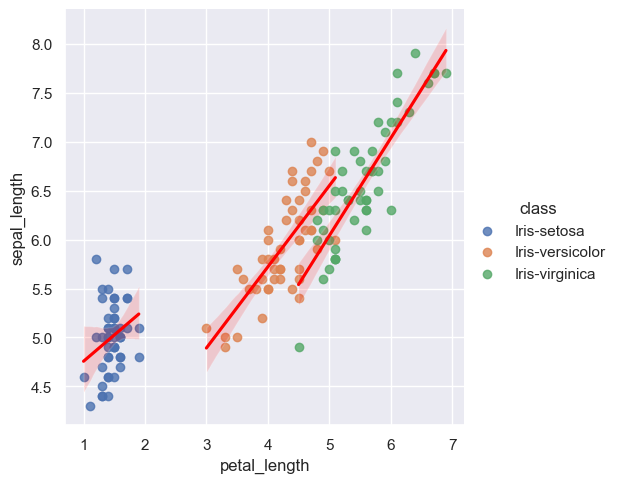

In [34]:
sns.lmplot(data=iris_data, x="petal_length", y="sepal_length", line_kws={'color': 'red'}, hue='class')

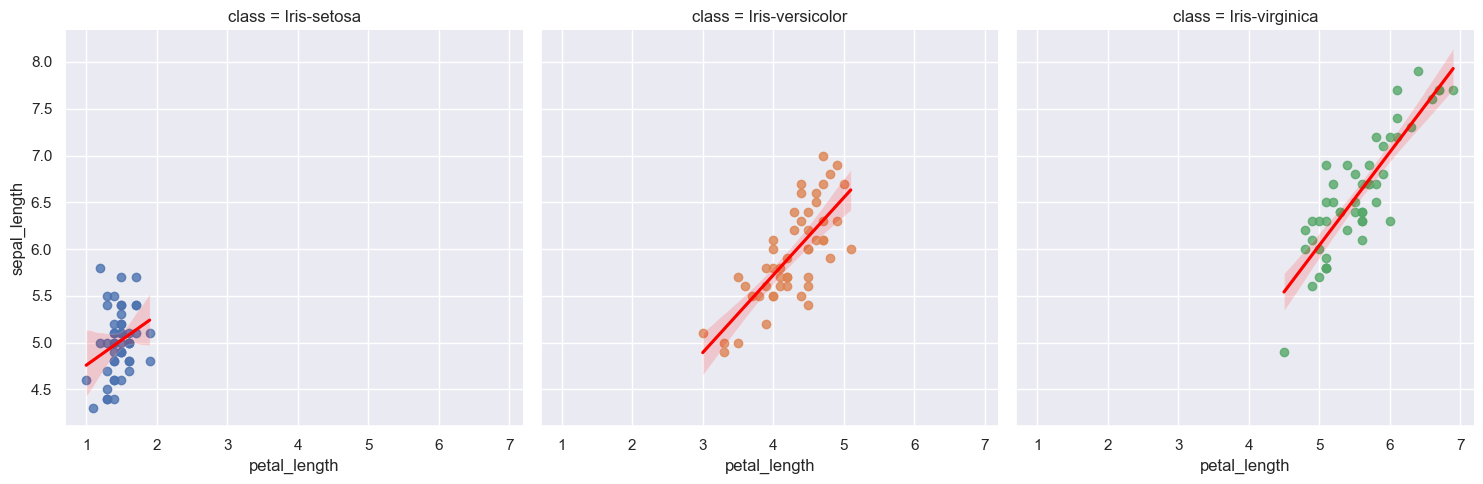

In [35]:
sns.lmplot(data=iris_data, x="petal_length", y="sepal_length", col="class", line_kws={'color': 'red'},col_wrap=3, hue='class')

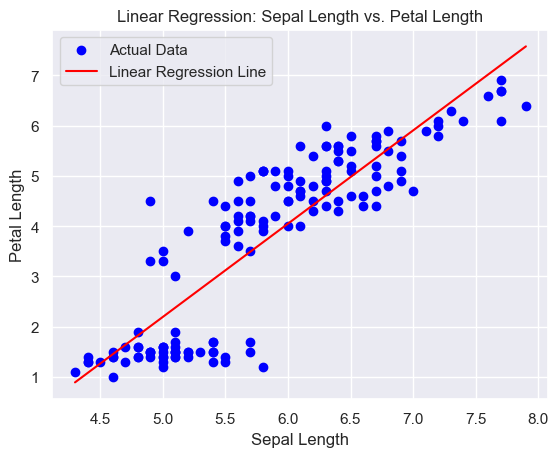

In [40]:
import statsmodels.api as sm

# Extract the sepal length as the independent variable (X)
X = iris_data['sepal_length']

# Add a constant term (intercept) to the independent variable
X = sm.add_constant(X)

# Extract the petal length as the dependent variable (y)
y = iris_data['petal_length']

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Make predictions for the entire range of sepal lengths in the dataset
min_sepal_length = X['sepal_length'].min()
max_sepal_length = X['sepal_length'].max()
sepal_length_range = [min_sepal_length, max_sepal_length]
predictions = results.predict(sm.add_constant(sepal_length_range))

# Plot the actual data points
plt.scatter(X['sepal_length'], y, label='Actual Data', color='blue')

# Plot the linear regression line
plt.plot(sepal_length_range, predictions, label='Linear Regression Line', color='red')

# Set labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Linear Regression: Sepal Length vs. Petal Length')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [41]:
# New sepal length value for prediction
new_sepal_length = 6.0

# Add a constant term (intercept) to the new value
new_data = sm.add_constant(pd.Series([new_sepal_length]))

# Make predictions
predicted_petal_length = results.predict(new_data)

# Print the predicted petal length
print("Predicted Petal Length:", predicted_petal_length[0])

c:\Users\JuliaSjöholm-AI23GBG\.virtualenvs\Statistics-Julia-Sjoholm-FiPAjG2L\Lib\site-packages\statsmodels\tsa\tsatools.py:161: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)


ValueError: shapes (1,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)